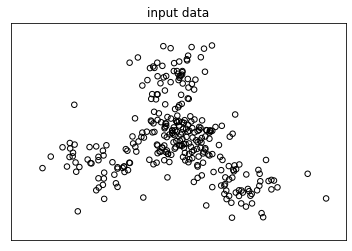

In [6]:
'''KMeans 聚类数据集'''
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

def load_data(input_file):
    X = []
    with open(input_file,'r') as f:
        for line in f.readlines():
            data = [float(x) for x in line.split(',')]
            X.append(data)
    return np.array(X)

data = load_data('data_multivar.txt')

num_clusters = 4

plt.figure()
plt.scatter(data[:,0],data[:,1],marker='o',facecolor='none',edgecolor='k',s=30)
x_min, x_max = min(data[:,0]) -1, max(data[:,1]) +1
y_min, y_max = min(data[:,1]) -1, max(data[:,1]) +1
plt.title('input data')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.xticks(())
plt.yticks(())
plt.show()

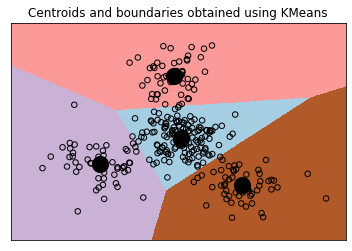

In [15]:
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)
X, Y = np.array(data[:,:-1]), np.array(data[:,-1])
kmeans.fit(X)

# 网格边界
step_size = 0.01
x_values, y_values = np.meshgrid(np.arange(x_min,x_max,step_size),np.arange(y_min,y_max,step_size))

# 预测网格中的所有数据点的标记
#predicted_labels = kmeans.predict(np.c_[x_values.ravel(), y_values.ravel()])
predicted_labels = kmeans.predict(np.c_[x_values.ravel(), y_values.ravel()])
predicted_labels = predicted_labels.reshape(x_values.shape)

# 画出结果
plt.figure()
plt.clf()
plt.imshow(predicted_labels, interpolation='nearest', extent=(x_values.min(), x_values.max(), y_values.min(), y_values.max()),
          cmap=plt.cm.Paired, aspect='auto', origin='lower')
plt.scatter(data[:,0],data[:,1],marker='o',facecolor='none',edgecolor='k',s=30)

# 把中心点画在图形上
controids = kmeans.cluster_centers_
plt.scatter(controids[:,0], controids[:,1], marker='o', s=200, linewidth=3, color='k', zorder=10, facecolor='black')
plt.title('Centroids and boundaries obtained using KMeans')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()